# Atividade Pontuada 03

Aluno: Davi Araújo do Nascimento\
Matrícula: 202300027801

Aqui estão definidas as importações e uma classe simples para os elementos estruturantes.

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt 

In [2]:
# Classe para os elementos estruturantes
# Permite agrupar a matriz com a informação da origem

class ElementoEstruturante:
    matriz = []
    origem = (0, 0)

    # Por padrão define a origem no centro. Se a matriz tem raio par, o espaço mais próximo do (0, 0) é escolhido
    def __init__(self, matriz: np.ndarray):
        self.origem = (
            matriz.shape[0] // 2,
            matriz.shape[1] // 2
        )
        
        self.matriz = matriz

    def calcularRaio(self) -> (int, int):
        return (self.matriz.shape[0] // 2, self.matriz.shape[1] // 2)

## Questão 01

É feita a leitura da imagem da digital de um dedo humano

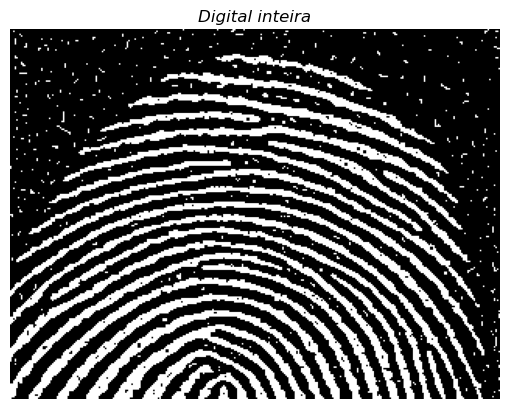

In [3]:
digital_inteira = imread("digital.png")

plt.title("Digital inteira", fontstyle="italic")
plt.axis("off")
plt.imshow(digital_inteira, cmap="gray")

A parte superior direita da imagem é selecionada para fazer os testes das operações.

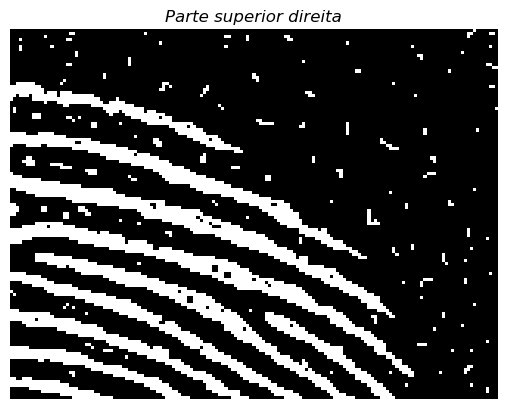

In [4]:
dim = digital_inteira.shape
digital_supdir = digital_inteira[
    0 : dim[0] // 2, 
    dim[1] // 2 + 1 : dim[1]
]

plt.title("Parte superior direita", fontstyle="italic")
plt.axis("off")
plt.imshow(digital_supdir, cmap="gray")

### Funções

Esta seção do notebook contém as funções das operações pedidas na questão um.

Primeiro estão definidas a função que calcula a erosão de uma imagem e e sua função auxiliar para aumentar a legibilidade do código.\
Todos os algoritmos são lentos pois seguem a definição matemática sem otimização e não aproveitam de paralelização, o que leva a complexidades de ordem n².\
Porém esta é a forma básica que tem de ser feita pelo menos uma vez para entedimento das operações. Pelo menos a imagem de teste é pequena.

In [5]:
# Recebe um elemento estruturante e uma matriz do mesmo tamanho e faz o pareamento element-wise usando como base de comparação os 1s do elemento estruturante
# Para o pareamento suceder é necessário que todos os 1s do elemento estruturante possuam um par correspondente na matriz

def pareamentoERO(fatia_img: np.ndarray, ee: ElementoEstruturante) -> bool:
    if fatia_img.shape != ee.matriz.shape:
        raise Exception(f"Tamanhos diferentes | A: {fatia_img.shape}, B: {ee.shape}")

    for i in range(0, fatia_img.shape[0]):
        for j in range(0, fatia_img.shape[1]):
            # Ignora qualquer valor do elemento estruturante que não seja 1
            if(ee.matriz[i][j] != 1):
                continue

            # No primeiro 1 não correspondentes com a imagem o pareamento falha
            if(fatia_img[i][j] != ee.matriz[i][j]):
                return False

    # Caso todos os 1s do elemento estruturante possuam um par correspondente na imagem, então o pareamento sucede
    return True

In [6]:
# Recebe uma imagem binária e aplica a operação de erosão com base no elemento estruturante
# Esta função admite elementos estruturantes de qualquer proporção

def erosao(imagem: np.ndarray, ee: ElementoEstruturante) -> np.ndarray:
    img_shape = imagem.shape
    ee_shape  = ee.matriz.shape
    
    if(img_shape[0] < ee_shape[0] or img_shape[1] < ee_shape[1]):
        raise Exception("Elemento estruturante maior que imagem")

    out      = np.zeros(img_shape)
    ee_raio  = ee.calcularRaio()

    # Padding de acordo com o raio do elemento estruturante
    # Serve para tratar a borda da imagem com mais facilidade
    imagem_pad = np.pad(imagem, ((ee_raio[0], ee_raio[0]), (ee_raio[1], ee_raio[1])))
    img_shape  = imagem_pad.shape
    
    for i in range(ee_raio[0], img_shape[0] - ee_raio[0] - 1):
        for j in range(ee_raio[1], img_shape[1] - ee_raio[1] - 1):
            # Um pedaço da imagem é selecionado para ser feito o pareamento sobre
            pedaco_imagem = imagem_pad[
                i - ee_raio[0] : i + ee_raio[0] + (ee_shape[0] % 2),
                j - ee_raio[1] : j + ee_raio[1] + (ee_shape[1] % 2)
            ]

            # Caso o pareamento suceda a origem é marcada com o número 1
            if pareamentoERO(pedaco_imagem, ee):
                out[
                    i + ee.origem[0] - ee_raio[0] - 1, 
                    j + ee.origem[1] - ee_raio[1] - 1
                ] = 1

    return out

In [7]:
# Recebe um elemento estruturante e uma matriz do mesmo tamanho e faz o pareamento element-wise usando como base de comparação os 1s do elemento estruturante
# Para o pareamento suceder é necessário que ao menos um dos 1s do elemento estruturante possua um par correspondente na matriz

def pareamentoDIL(fatia_img: np.ndarray, ee: ElementoEstruturante) -> bool:
    if fatia_img.shape != ee.matriz.shape:
        raise Exception(f"Tamanhos diferentes | A: {fatia_img.shape}, B: {ee.shape}")

    for i in range(0, fatia_img.shape[0]):
        for j in range(0, fatia_img.shape[1]):
            # Ignora qualquer valor do elemento estruturante que não seja 1
            if(ee.matriz[i][j] != 1):
                continue

            # No primeiro 1 correspondentes com a imagem o pareamento sucede
            if(fatia_img[i][j] == ee.matriz[i][j]):
                return True

    # Caso todos os 1s do elemento estruturante não possuam um par correspondente na imagem, então o pareamento falha
    return False

In [8]:
# Recebe uma imagem binária e aplica a operação de dilatação com base no elemento estruturante
# Esta função admite elementos estruturantes de qualquer proporção

def dilatacao(imagem: np.ndarray, ee: ElementoEstruturante) -> np.ndarray:
    img_shape = imagem.shape
    ee_shape  = ee.matriz.shape
    
    if(img_shape[0] < ee_shape[0] or img_shape[1] < ee_shape[1]):
        raise Exception("Elemento estruturante maior que imagem")

    out      = np.zeros(img_shape)
    ee_raio  = ee.calcularRaio()

    # Padding de acordo com o raio do elemento estruturante
    # Serve para tratar a borda da imagem com mais facilidade
    imagem_pad = np.pad(imagem, ((ee_raio[0], ee_raio[0]), (ee_raio[1], ee_raio[1])))
    img_shape  = imagem_pad.shape
    
    for i in range(ee_raio[0], img_shape[0] - ee_raio[0] - 1):
        for j in range(ee_raio[1], img_shape[1] - ee_raio[1] - 1):
            # Um pedaço da imagem é selecionado para ser feito o pareamento sobre
            pedaco_imagem = imagem_pad[
                i - ee_raio[0] : i + ee_raio[0] + (ee_shape[0] % 2),
                j - ee_raio[1] : j + ee_raio[1] + (ee_shape[1] % 2)
            ]

            # Caso o pareamento suceda a origem é marcada com o número 1
            if pareamentoDIL(pedaco_imagem, ee):
                out[
                    i + ee.origem[0] - ee_raio[0] - 1,
                    j + ee.origem[1] - ee_raio[1] - 1, 
                ] = 1

    return out

In [9]:
# Recebe uma imagem binária e aplica a operação de abertura com base no elemento estruturante
# Esta função admite elementos estruturantes de qualquer proporção

def abertura(imagem: np.ndarray, ee: ElementoEstruturante) -> np.ndarray:
    return dilatacao(
        erosao(imagem, ee), 
        ee
    )  

In [10]:
# Recebe uma imagem binária e aplica a operação de fechamento com base no elemento estruturante
# Esta função admite elementos estruturantes de qualquer proporção

def fechamento(imagem: np.ndarray, ee: ElementoEstruturante) -> np.ndarray:
    return erosao(
        dilatacao(imagem, ee), 
        ee
    )

In [11]:
# Recebe um elemento estruturante e uma matriz do mesmo tamanho e faz o pareamento element-wise usando como base de comparação os 0s e 1s do elemento estruturante
# Para o pareamento suceder é necessário que todos os 0s e 1s do elemento estruturante possuam um par correspondente na matriz

def pareamentoHOM(fatia_img: np.ndarray, ee: ElementoEstruturante):
    if fatia_img.shape != ee.matriz.shape:
        raise Exception(f"Tamanhos diferentes | A: {fatia_imagem.shape}, B: {ee.shape}")

    shape = fatia_img.shape

    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            # Ignora qualquer valor do elemento estruturante que não seja 0 ou 1
            if(ee.matriz[i][j] not in [0, 1]):
                continue

            # No primeiro par não correspondente o pareamento falha
            if(fatia_img[i][j] != ee.matriz[i][j]):
                return False

    # Caso todos os 0s e 1s possuam pares correspondentes o pareamento sucede
    return True

In [12]:
# Recebe uma imagem binária e aplica a operação de hit or miss com base no elemento estruturante
# Esta função admite elementos estruturantes de qualquer proporção
# Para economizar memória e simplificar o processo, os dois elementos estrurantes necessários para realizar a operação estão juntos num só
# 0 é usado como background, 1 é usado como foreground e qualquer outro valor, de preferência -1, é usado para ignorar o pixel da imagem

def hitOrMiss(imagem: np.ndarray, ee: ElementoEstruturante) -> np.ndarray:
    img_shape = imagem.shape
    ee_shape  = ee.matriz.shape
    
    if(img_shape[0] < ee_shape[0] or img_shape[1] < ee_shape[1]):
        raise Exception("Elemento estruturante maior que imagem")

    out      = np.zeros(img_shape)
    ee_raio  = ee.calcularRaio()

    # Padding de acordo com o raio do elemento estruturante
    # Serve para tratar a borda da imagem com mais facilidade
    imagem_pad = np.pad(imagem, ((ee_raio[0], ee_raio[0]), (ee_raio[1], ee_raio[1])))
    img_shape  = imagem_pad.shape

    for i in range(ee_raio[0], img_shape[0] - ee_raio[0] - 1):
        for j in range(ee_raio[1], img_shape[1] - ee_raio[1] - 1):
            # Um pedaço da imagem é selecionado para ser feito o pareamento sobre
            pedaco_imagem = imagem_pad[
                i - ee_raio[0] : i + ee_raio[0] + (ee_shape[0] % 2),
                j - ee_raio[1] : j + ee_raio[1] + (ee_shape[1] % 2)
            ]

            # Caso o pareamento suceda a origem é marcada com o número 1
            if pareamentoHOM(pedaco_imagem, ee):
                out[
                    i + ee.origem[0] - ee_raio[0] - 1, 
                    j + ee.origem[1] - ee_raio[1] - 1
                ] = 1

    return out

In [13]:
# Recebe uma imagem binária e aplica a operação de afinamento com base em dois elementos estruturantes
# Esta função admite elementos estruturantes de qualquer proporção
# Um dos elementos estruturantes é vertical e outro diagonal

def afinamento(imagem: np.ndarray, ee: (ElementoEstruturante, ElementoEstruturante)) -> np.ndarray:
    out = imagem.copy()
    
    while(True):
        # Cópia para servir como referência se a imagem de saída atingiu a convergência total
        antes = out.copy()

        # O primeiro elemento estruturante é selecionado para fazer as operações
        aux = ee[0]

        # O elemento estruturante é aplicado 4 vezes em cada uma das suas possíveis rotações em 90°
        for i in range(0, 3):
            out = np.logical_xor(out, hitOrMiss(out, aux))
            aux.matriz = np.rot90(aux.matriz)
    
        out = np.logical_xor(out, hitOrMiss(out, aux))

        # Mesmo processo acontece para o segundo elemento estruturante
        aux = ee[1]
        
        for i in range(0, 3):
            out = np.logical_xor(out, hitOrMiss(out, aux))
            aux.matriz = np.rot90(aux.matriz)

        out = np.logical_xor(out, hitOrMiss(out, aux))

        # Condição de saída: após as operações nada mudar entre o antes e depois
        if(np.all(antes == out)):
            return out

In [14]:
# Recebe uma imagem binária e aplica a operação de poda

def poda(imagem: np.ndarray) -> np.ndarray:
    
    # Elemento estruturantes predifinidos para essa operação
    ee_vertical = np.array([
        [-1,  0,  0],
        [ 1,  1,  0],
        [-1,  0,  0],
    ])

    ee_diagonal = np.array([
        [ 1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0,  0],
    ])
    
    ee_vertical = ElementoEstruturante(ee_vertical)
    ee_diagonal = ElementoEstruturante(ee_diagonal)
    
    out = imagem.copy()

    # Faço as rotações e aplico o hit or miss com XOR 4 vezes com os dois elementos estruturantes
    for i in range(0, 3):
        out = np.logical_xor(out, hitOrMiss(out, ee_vertical))
        ee_vertical.matriz = np.rot90(ee_vertical.matriz)

    out = np.logical_xor(out, hitOrMiss(out, ee_vertical))

    for i in range(0, 3):
        out = np.logical_xor(out, hitOrMiss(out, ee_diagonal))
        ee_diagonal.matriz = np.rot90(ee_diagonal.matriz)

    out = np.logical_xor(out, hitOrMiss(out, ee_diagonal))
        
    return out

### Aplicações

A partir daqui serão aplicadas as operações na imagem da digital como forma de teste.

In [15]:
# Primeiro é feito um tratamento para remover o ruído da imagem de deixar apenas a digital

# Elemento estruturante de proporção 5:3
ee_abertura = np.array([
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
])
ee_abertura = ElementoEstruturante(ee_abertura)

digital_sem_ruido = abertura(digital_supdir, ee_abertura)

# Elemento estruturante de tamanho par
ee_fechamento = np.array([
    [1, 1],
    [1, 1]
])
ee_fechamento = ElementoEstruturante(ee_fechamento)

digital_sem_ruido = fechamento(digital_sem_ruido, ee_fechamento)

In [16]:
# Próximo passo é aplicar o afinamento
# Elementos estruturantes tirados de um dos notebooks feitos em sala de aula
ee_vertical = np.array([
    [1, 1, 1],
    [-1, 1, -1],
    [0, 0, 0]
])

ee_diagonal = np.array([
    [-1, 0, 0],
    [1, 1, 0],
    [1, 1, -1]
])

ee_vertical = ElementoEstruturante(ee_vertical)
ee_diagonal = ElementoEstruturante(ee_diagonal)

digital_afinada = afinamento(digital_sem_ruido, (ee_vertical, ee_diagonal))

In [17]:
# E por último a poda

digital_podada = poda(digital_afinada)

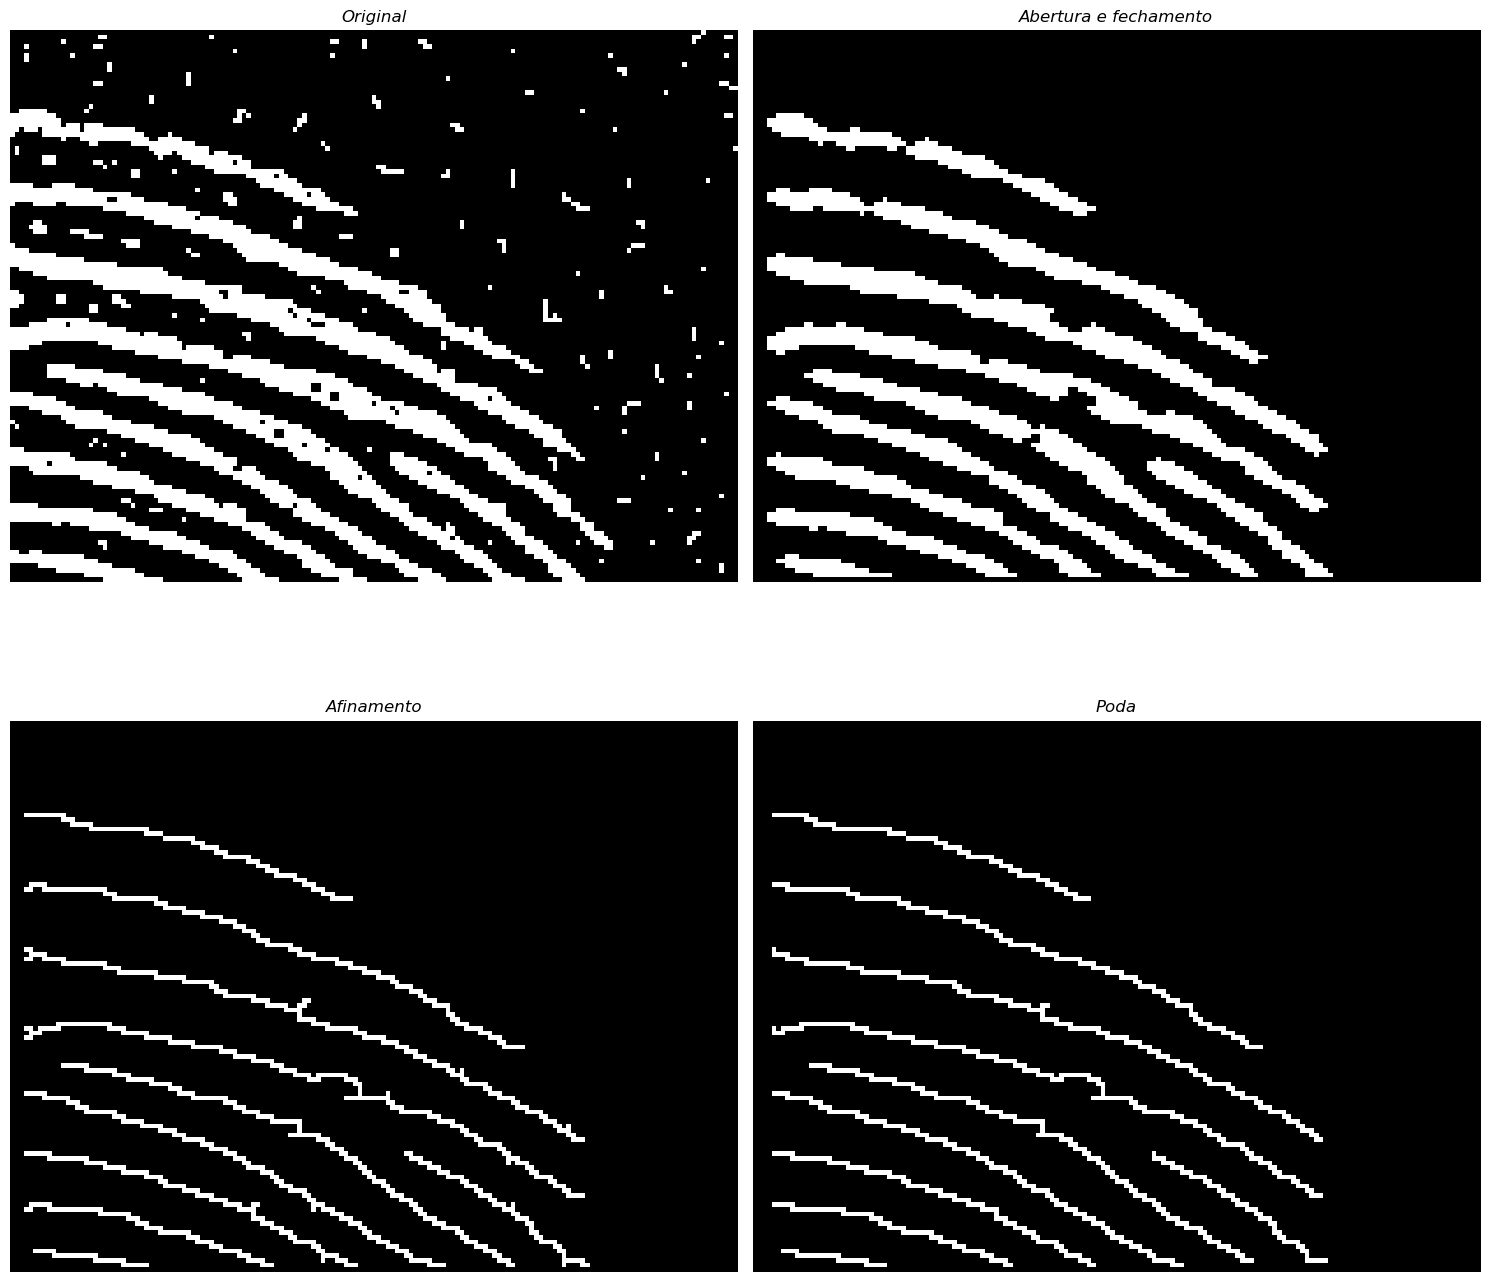

In [18]:
# Agora serão mostrados os resultados

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0, 0].set_title("Original", fontstyle="italic")
axes[0, 0].axis("off")
axes[0, 0].imshow(digital_supdir, cmap="gray")

axes[0, 1].set_title("Abertura e fechamento", fontstyle="italic")
axes[0, 1].axis("off")
axes[0, 1].imshow(digital_sem_ruido, cmap="gray")

axes[1, 0].set_title("Afinamento", fontstyle="italic")
axes[1, 0].axis("off")
axes[1, 0].imshow(digital_afinada, cmap="gray")

axes[1, 1].set_title("Poda", fontstyle="italic")
axes[1, 1].axis("off")
axes[1, 1].imshow(digital_podada, cmap="gray")

fig.tight_layout()

## Questão 02

Uma das imagens que eram possíveis de ser escolhidas lidas em escala de cinza

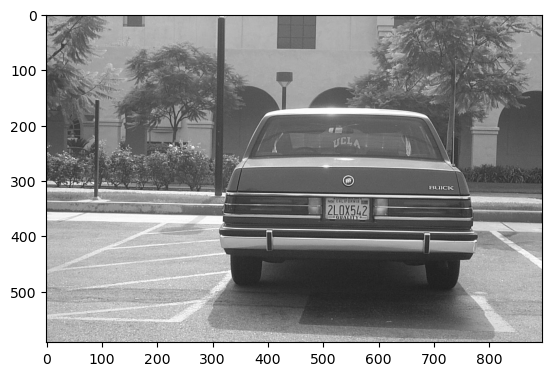

In [19]:
carro_inteiro = (imread("carro.jpg", as_gray=True) * 255).astype(np.uint8)
plt.imshow(carro_inteiro, cmap="gray")

É extraída a parte inferior direita da imagem como pedido na especificação da atividade

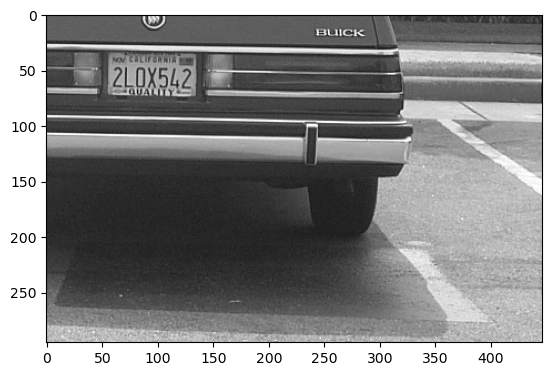

In [20]:
dim = carro_inteiro.shape
carro_infdir = carro_inteiro[
    dim[0] // 2 + 1 : dim[0],
    dim[1] // 2 + 1 : dim[1]
]
plt.imshow(carro_infdir, cmap="gray")

In [21]:
def top_hat(imagem: np.ndarray, elemento_estruturante: np.ndarray) -> np.ndarray:
    pass

Nota: \
      _Infelizmente, não vou conseguir terminar essa atividade toda a tempo, ainda passei bastante tempo pesquisando e testando os algoritmos e tendo certeza que tava fazendo certo.\
      Acredito que para um trabalho desse nível aqui é necessário mais tempo, no geral acho que os trabalhos da matéria deveriam ter um prazo mais longo. Não sei, pode ser só eu.\
      Tava fazendo outro trabalho em conjunto com esse e ainda preciso estudar para a prova de IA amanhã. Fico triste porque foi divertido fazer os algoritmos, no geral\
      os trabalhos da matéria são bem legais, só temos pouco tempo para fazê-los._

## Referências
- https://en.wikipedia.org/wiki/Erosion_(morphology)
- https://homepages.inf.ed.ac.uk/rbf/HIPR2/erode.htm
- https://www.youtube.com/watch?v=b5lgnNEzGeU
- https://www.youtube.com/watch?v=9UEzr3BakQo
- https://en.wikipedia.org/wiki/Dilation_(morphology)
- https://homepages.inf.ed.ac.uk/rbf/HIPR2/dilate.htm
- https://www.youtube.com/watch?v=3IJ8RFtlDLY
- https://en.wikipedia.org/wiki/Hit-or-miss_transform
- https://homepages.inf.ed.ac.uk/rbf/HIPR2/hitmiss.htm
- https://en.wikipedia.org/wiki/Thinning_(morphology)
- https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm
- https://en.wikipedia.org/wiki/Pruning_(morphology)
- https://en.wikipedia.org/wiki/Morphological_skeleton
- https://homepages.inf.ed.ac.uk/rbf/HIPR2/skeleton.htm
- https://github.com/japgarrido/Skeletonization-Methods-comparison